# Walk Run Classification Using Sensor Data

## Problem Statement
Task 1:-Prepare a complete data analysis report on the given data.

Task 2:-Create a predictive model to classify whether a person is running or walking based on the given predictor variables.
 


## Domain Expertise

- Date: This feature represents the calendar date when the sensor readings were recorded. It helps to identify the specific day on which the activity took place.

- Time: This feature represents the time of day when the sensor readings were recorded. It is likely recorded in a 24-hour format (e.g., 13:45 for 1:45 PM) and helps to pinpoint the exact time when the activity occurred.

- Username: This feature is a unique identifier for each user who participated in the data collection process. It allows to distinguish between different individuals and analyze their respective sensor data separately.

- Wrist: This feature indicates which wrist (left or right) the sensor was worn on during the activity. This information can be useful if there are any differences in the sensor readings based on the wrist placement.

- Activity: This feature specifies the type of activity being performed by the user, in your case, either running or walking. It serves as the target variable or label for any machine learning models you might build to classify or predict the activity based on the sensor readings.

- Acceleration_x, Acceleration_y, Acceleration_z: These features represent the acceleration values recorded by the accelerometer along the x, y, and z axes, respectively. Accelerometers measure the magnitude and direction of proper acceleration (the acceleration experienced relative to free-fall) in three-dimensional space. These values can help capture the movement patterns and intensity of the activity being performed.

- Gyro_x, Gyro_y, Gyro_z: These features represent the angular velocity values recorded by the gyroscope along the x, y, and z axes, respectively. Gyroscopes measure the rate of rotation around each axis, providing information about the orientation and rotational movements of the sensor. These values can further enhance the understanding of the user's motion patterns during the activity.


## Importing Necessary libraries

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,f1_score,roc_auc_score,precision_score,recall_score
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping,LearningRateScheduler
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch

## Loading of data

In [2]:
df = pd.read_csv("walkrun.csv")

## Basic checks

In [3]:
df.head()

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,2017-6-30,13:51:15:847724020,viktor,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,2017-6-30,13:51:16:246945023,viktor,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,2017-6-30,13:51:16:446233987,viktor,0,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
3,2017-6-30,13:51:16:646117985,viktor,0,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
4,2017-6-30,13:51:16:846738994,viktor,0,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922


In [4]:
df.tail()

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
88583,2017-7-9,20:9:15:317911028,viktor,0,0,0.3084,-0.8376,-0.1327,0.4823,2.0124,0.6048
88584,2017-7-9,20:9:15:517889022,viktor,0,0,0.4977,-1.0027,-0.4397,0.1022,-1.2565,-0.0761
88585,2017-7-9,20:9:15:717828989,viktor,0,0,0.4587,-1.1780,-0.2827,-1.4500,-0.2792,-1.2616
88586,2017-7-9,20:9:15:917932987,viktor,0,0,0.2590,-0.8582,-0.0759,-1.5165,0.4560,-1.7755
88587,2017-7-9,20:9:16:117410004,viktor,0,0,0.3140,-0.8008,-0.0911,0.1183,1.0850,1.2814


In [5]:
df.wrist.value_counts()

wrist
1    46258
0    42330
Name: count, dtype: int64

In [6]:
df.activity.value_counts()

activity
1    44365
0    44223
Name: count, dtype: int64

In [7]:
df.shape

(88588, 11)

There are 88588 rows and 11 columns

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88588 entries, 0 to 88587
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            88588 non-null  object 
 1   time            88588 non-null  object 
 2   username        88588 non-null  object 
 3   wrist           88588 non-null  int64  
 4   activity        88588 non-null  int64  
 5   acceleration_x  88588 non-null  float64
 6   acceleration_y  88588 non-null  float64
 7   acceleration_z  88588 non-null  float64
 8   gyro_x          88588 non-null  float64
 9   gyro_y          88588 non-null  float64
 10  gyro_z          88588 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 7.4+ MB


In [9]:
df.describe()

,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
count,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000
mean,0.522170,0.500801,-0.074811,-0.562585,-0.313956,0.004160,0.037203,0.022327
std,0.499511,0.500002,1.009299,0.658458,0.486815,1.253423,1.198725,1.914423
min,0.000000,0.000000,-5.350500,-3.299000,-3.753800,-4.430600,-7.464700,-9.480000
25%,0.000000,0.000000,-0.381800,-1.033500,-0.376000,-0.920700,-0.644825,-1.345125
50%,1.000000,1.000000,-0.059500,-0.759100,-0.221000,0.018700,0.039300,0.006900
75%,1.000000,1.000000,0.355500,-0.241775,-0.085900,0.888800,0.733700,1.398200
max,1.000000,1.000000,5.603300,2.668000,1.640300,4.874200,8.498000,11.266200


In [10]:
df.describe(include = 'O')

,date,time,username
count,88588,88588,88588
unique,12,88588,1
top,2017-7-16,13:51:15:847724020,viktor
freq,20480,1,88588


In [11]:
df.isnull().sum()

date              0
time              0
username          0
wrist             0
activity          0
acceleration_x    0
acceleration_y    0
acceleration_z    0
gyro_x            0
gyro_y            0
gyro_z            0
dtype: int64

In [12]:
df.isnull().sum()/ len(df)*100

date              0.0
time              0.0
username          0.0
wrist             0.0
activity          0.0
acceleration_x    0.0
acceleration_y    0.0
acceleration_z    0.0
gyro_x            0.0
gyro_y            0.0
gyro_z            0.0
dtype: float64

No missing values

In [13]:
#Checking number of unique rows in each feature
df.nunique().sort_values()

username              1
wrist                 2
activity              2
date                 12
acceleration_z    19698
acceleration_y    23957
acceleration_x    30307
gyro_y            38957
gyro_x            40988
gyro_z            51296
time              88588
dtype: int64

In [14]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

DATE :  12
2017-7-4      3225
2017-7-7      3280
2017-7-2      3933
2017-6-30     3992
2017-7-1      4201
2017-7-10     4337
2017-7-11     6696
2017-7-9      7788
2017-7-15     7934
2017-7-6     11357
2017-7-17    11365
2017-7-16    20480
Name: date, dtype: int64


TIME :  88588
13:51:15:847724020    1
13:51:17:246767997    1
13:51:17:446569025    1
13:51:17:646152973    1
13:51:17:846502006    1
                     ..
20:9:12:517301976     1
20:9:12:317988991     1
20:9:12:117035984     1
20:9:14:917038023     1
20:9:16:117410004     1
Name: time, Length: 88588, dtype: int64


USERNAME :  1
viktor    88588
Name: username, dtype: int64




In [7]:
df.drop(['date','time','username'], axis = 1,inplace=True)

The ‘date’, ‘time’, and ‘username’ columns are dropped from the DataFrame because they are not relevant to the walk-run classification task

# EDA

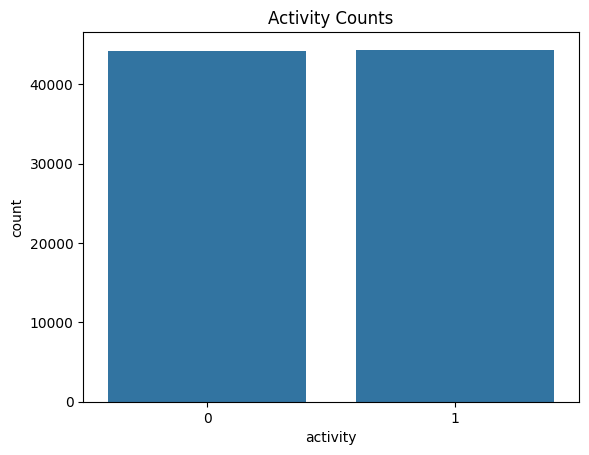

In [16]:
# Visualize the count of each activity
sns.countplot(x='activity', data=df)
plt.title('Activity Counts')
plt.show()


### Insights
- The target variable ‘activity’ in the dataset is well balanced. This is evident from the similar counts of the two classes.
- Given the balanced nature of the dataset, can infer that any model trained on this data is less likely to develop a bias towards a particular class. 
- The equal representation of both activities in the dataset suggests that the patterns corresponding to both running and walking have an equal opportunity to be learned by the model

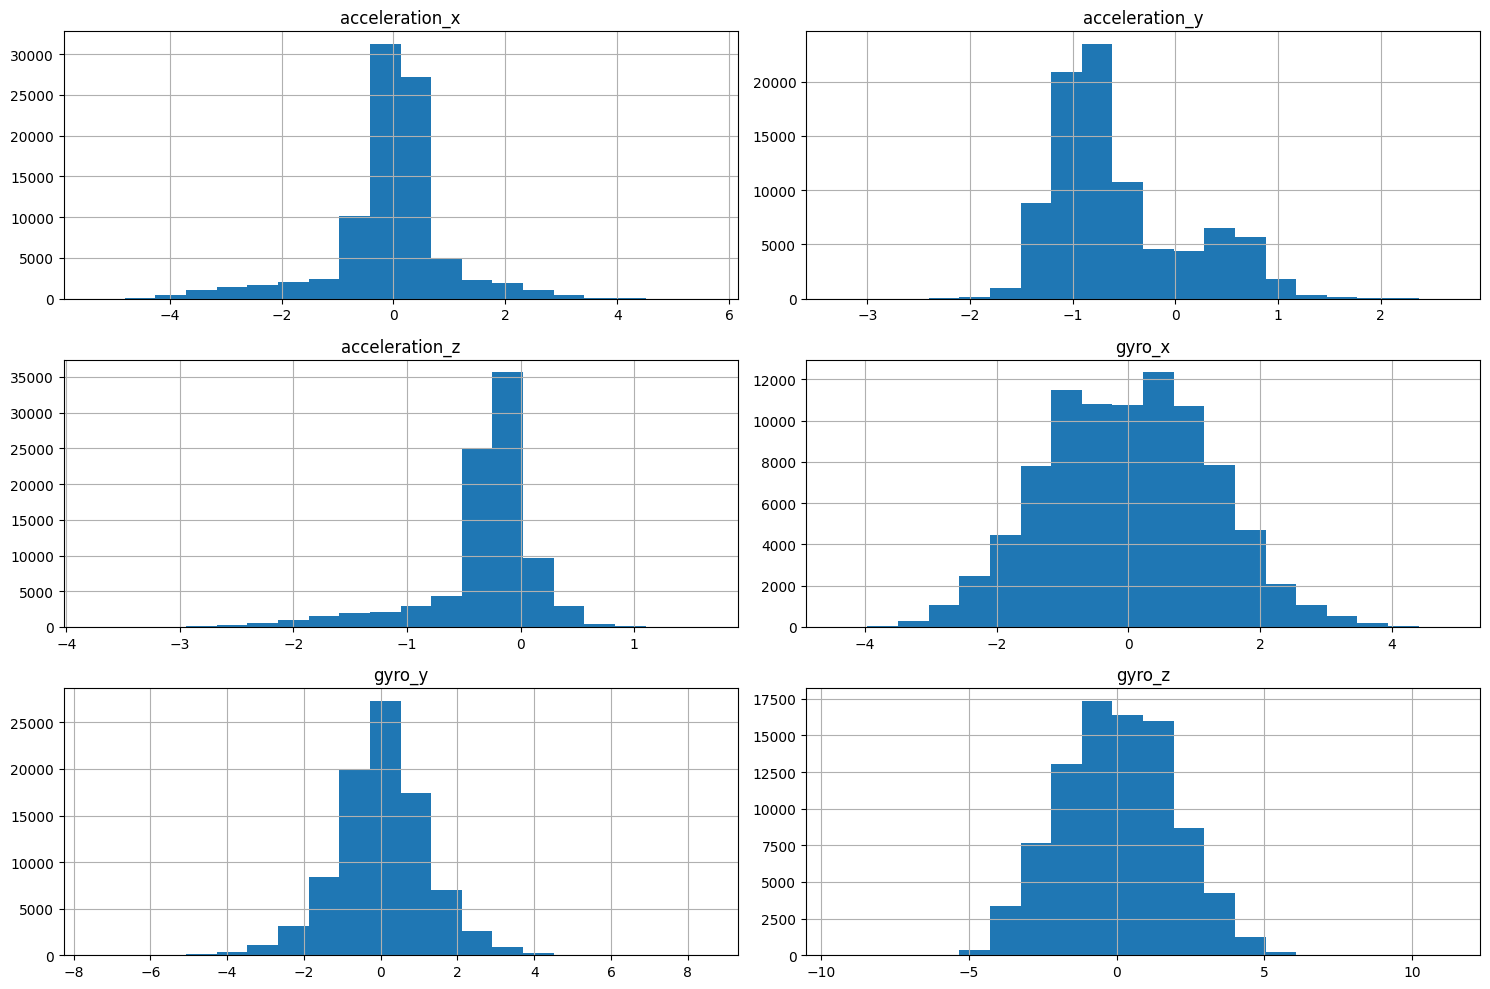

In [17]:
# Visualize the distributions of sensor readings
sensor_data = df[['acceleration_x', 'acceleration_y', 'acceleration_z', 'gyro_x', 'gyro_y', 'gyro_z']]
sensor_data.hist(bins=20,figsize=(15, 10))
plt.tight_layout()
plt.show()

## Bivariate Analysis

###  Classifying activities into walk and run

In [18]:
walk = 0
run = 1

In [19]:
print('Data contains ' + str(pd.value_counts(df['activity'].values)[0]) +
      ' "walk" data samples as well as ' + str(pd.value_counts(df['activity'].values)[1]) + 
      ' "run" data samples')

Data contains 44223 "walk" data samples as well as 44365 "run" data samples


In [20]:
# Analyzing activity data
sensor_data = df[['acceleration_x', 'acceleration_y', 'acceleration_z', 'gyro_x', 'gyro_y', 'gyro_z']]
# populate dataframe with '0' 
df_0_data = pd.DataFrame()
df_0_data = df[df.activity == 0]

# populate dataframe with '1'
df_1_data = pd.DataFrame()
df_1_data = df[df.activity == 1]

In [21]:
sns.set(rc={"figure.figsize": (18, 8)})

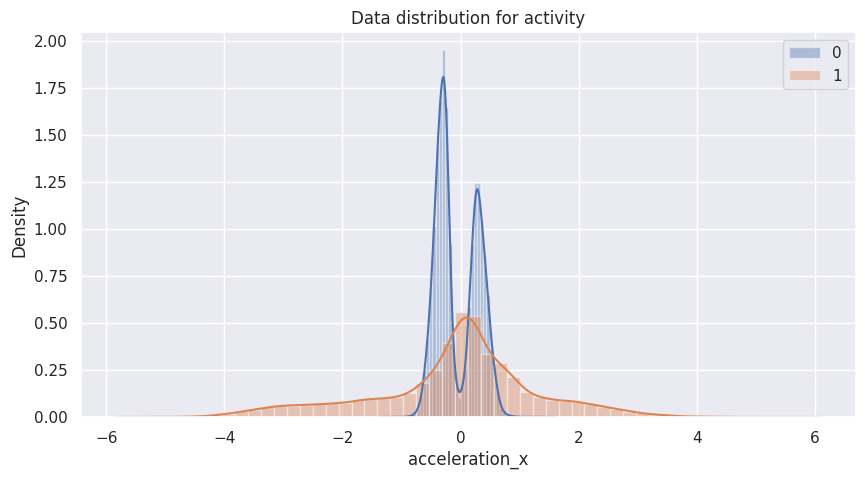

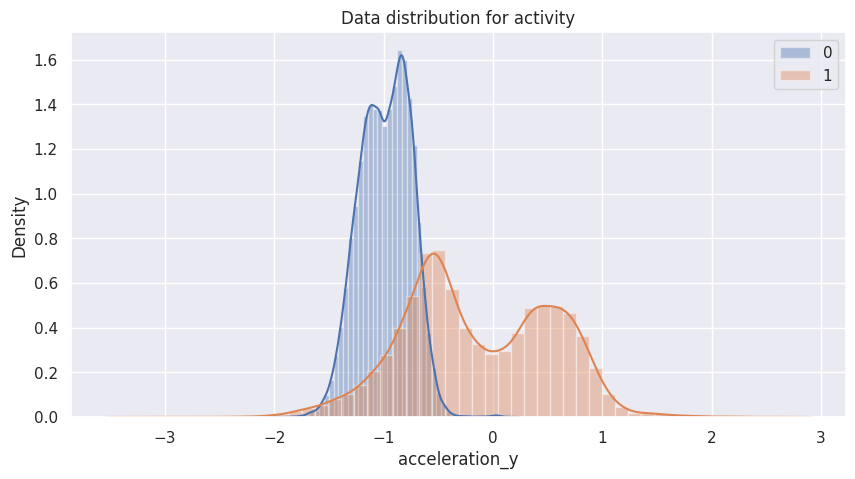

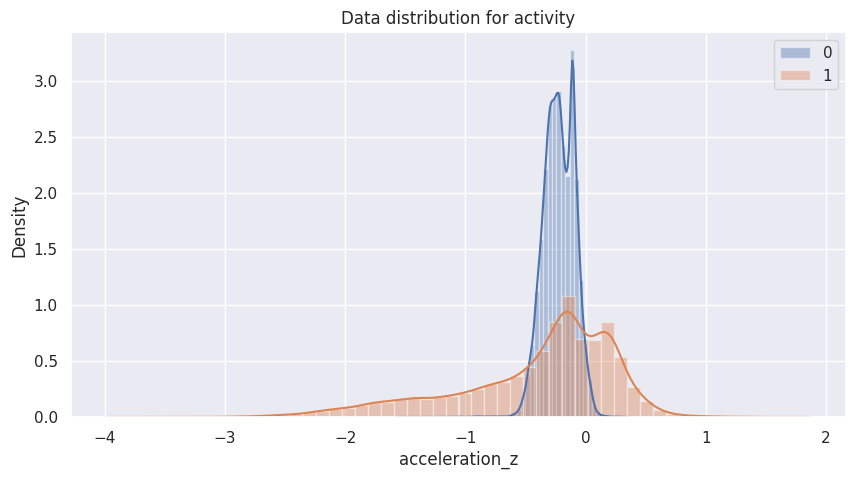

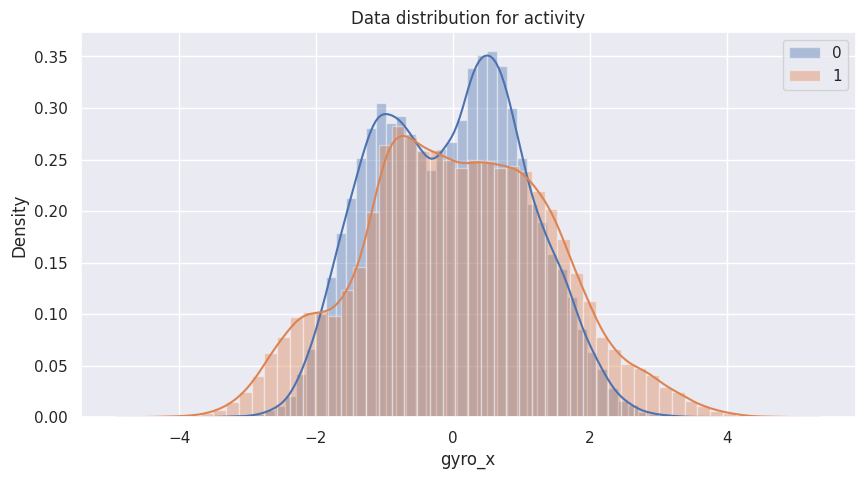

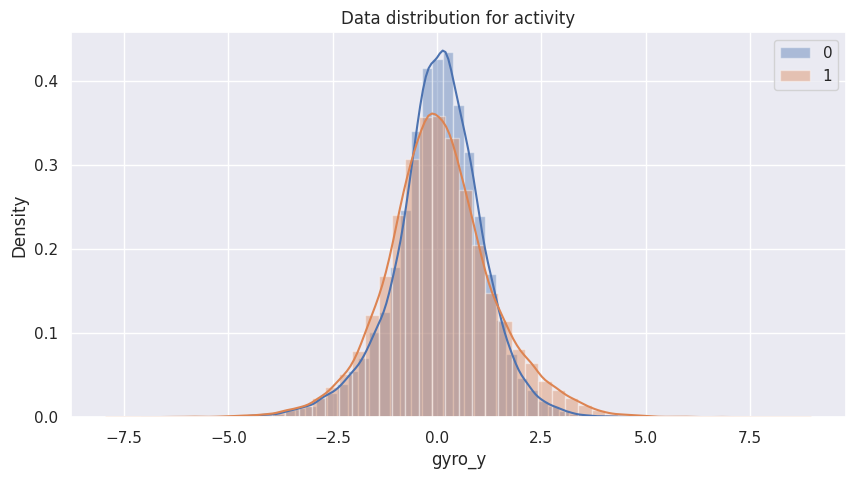

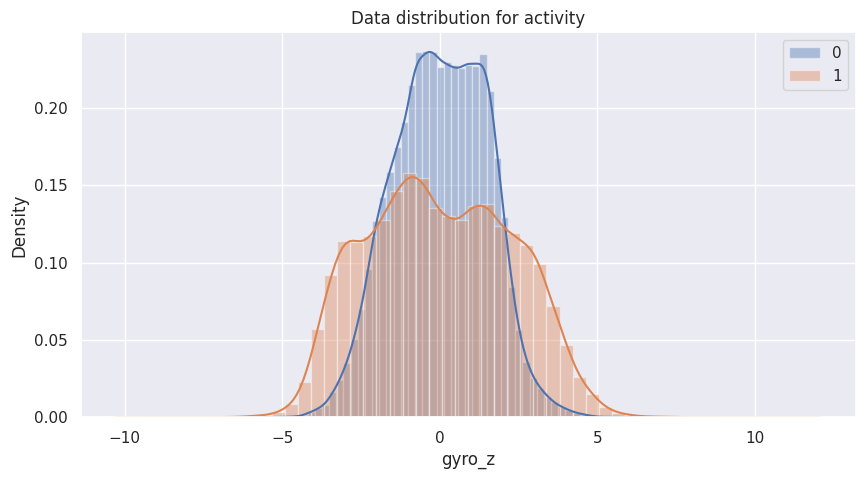

In [22]:
for c in sensor_data:
    plt.figure(figsize=(10,5))
    plt.title("Data distribution for activity")
    sns.distplot(df_0_data[c], label='0')
    sns.distplot(df_1_data[c], label='1')
    plt.legend()
    plt.show()

### Classifying wrist into left and right

In [23]:
left = 0
right = 1

In [24]:
left_wrist_samples = pd.value_counts(df['wrist'].values)[0]
right_wrist_samples = pd.value_counts(df['wrist'].values)[1]
print(f"The data contains {left_wrist_samples} data samples collected on the left wrist as well as {right_wrist_samples} data samples collected on the right wrist")

The data contains 42330 data samples collected on the left wrist as well as 46258 data samples collected on the right wrist


In [25]:
# Analyzing wrist data
sensor_data = df[['acceleration_x', 'acceleration_y', 'acceleration_z', 'gyro_x', 'gyro_y', 'gyro_z']]
# populate dataframe with 'left' wrist only
df_left_wrist_data = pd.DataFrame()
df_left_wrist_data = df[df.wrist == 0]

# populate dataframe with 'right' wrist only
df_right_wrist_data = pd.DataFrame()
df_right_wrist_data = df[df.wrist == 1]

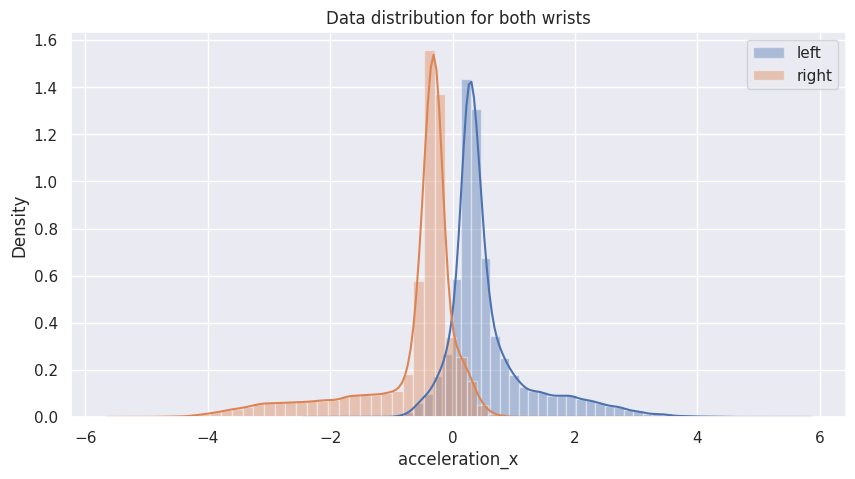

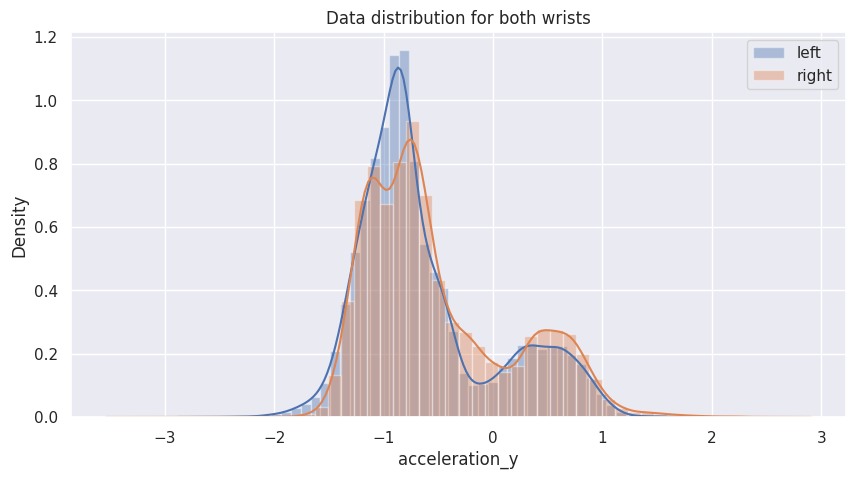

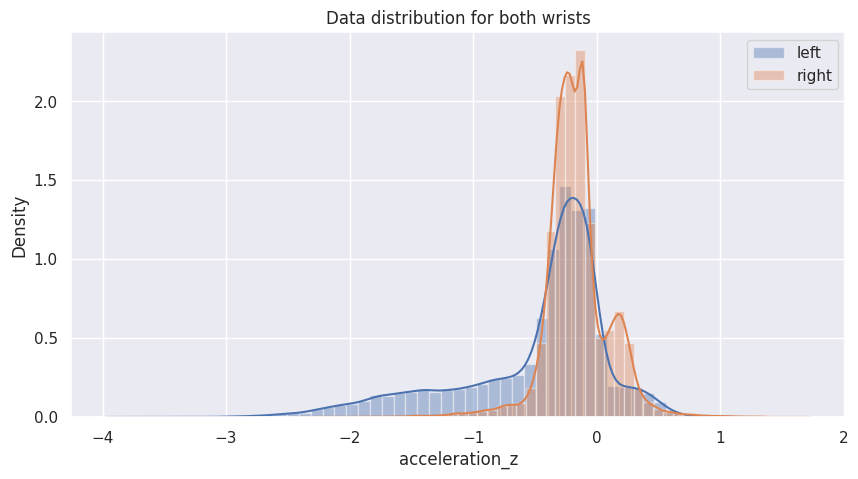

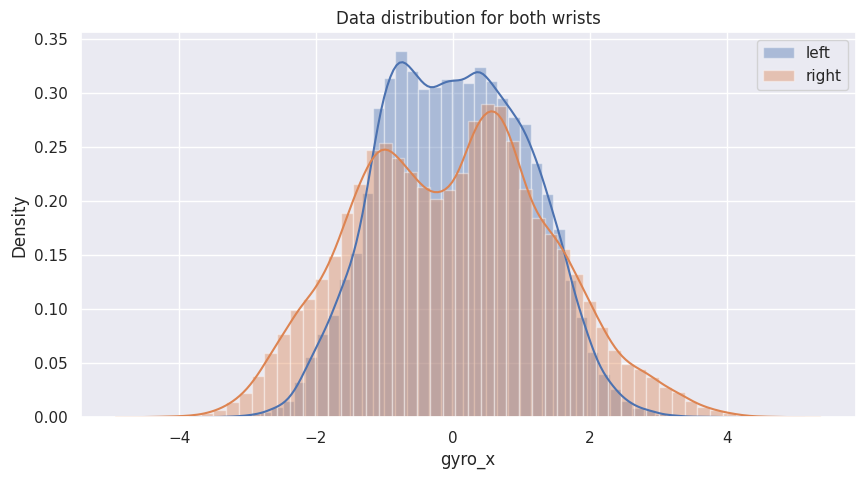

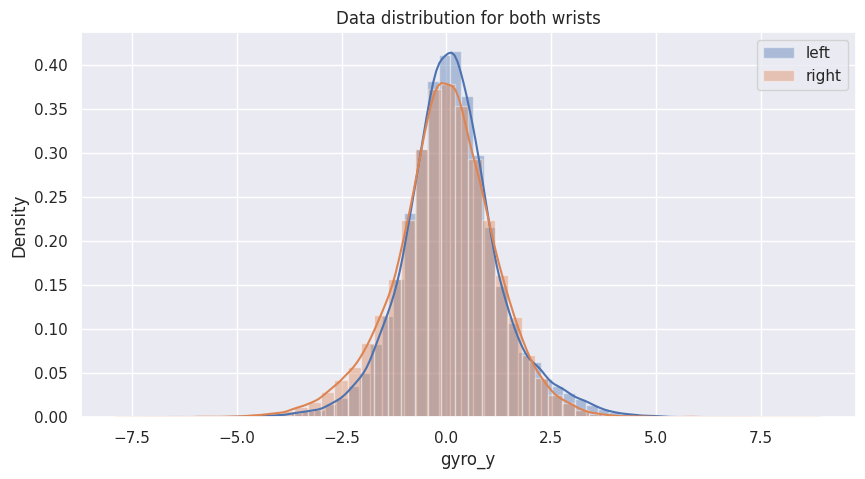

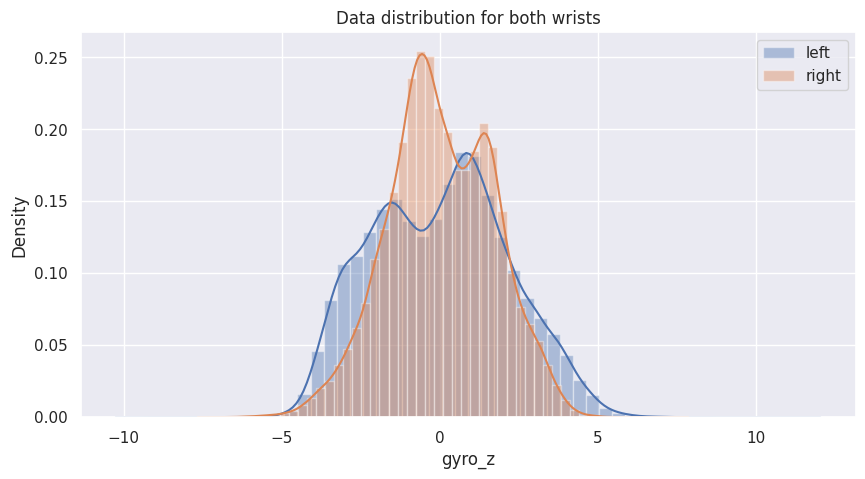

In [26]:
for c in sensor_data:
    plt.figure(figsize=(10,5))
    plt.title("Data distribution for both wrists")
    sns.distplot(df_left_wrist_data[c], label='left')
    sns.distplot(df_right_wrist_data[c], label='right')
    plt.legend()
    plt.show()

## Insights

- There are distinct patterns in acceleration data between walking and running, this could indicate different movement dynamics involved in these activities. For instance, running might show more abrupt changes in acceleration due to the impact of each step.

- When a person walks or runs, there is a significant amount of movement in the vertical direction (up and down). This is due to the lifting and dropping of the foot with each step. Therefore, the acceleration in the y direction (assuming y is the vertical axis)would show a greater variation.

- The movements in the horizontal plane (forward-backward and left-right) are generally less pronounced compared to the vertical movement, especially when the wrist is considered. This could explain why the frequency is lower and the values are mostly concentrated around a certain range for acceleration in the x and z directions

- Gyroscopic data, which measures rotational motion, could also provide valuable insights.The arm swing motion might be different between walking and running, which could be captured in the gyroscopic data.

- The mild increase in gyro_x during running could be capturing the increased intensity of arm swing motion in the forward and backward direction (assuming x is the forward-backward axis). The consistency in some ranges might indicate a steady rhythm in the arm swing during running. The decrease could be due to the slowing down of the arm swing as the running activity comes to an end.

- The fact that walking starts first in gyro_y could be due to the user starting to walk before transitioning into a run. The consistency during running might indicate a steady, rhythmic up and down motion of the arm (assuming y is the vertical axis). The higher values for running compared to walking could be due to the increased intensity and range of motion during running.

- The normal distribution pattern in gyro_z during running could suggest a consistent left and right rotation of the wrist (assuming z is the left-right axis). This could be due to the natural pronation and supination of the wrist during arm swing while running.

- The synchronization observed in the gyroscopic data could be capturing the coordinated and rhythmic nature of body movements during running. This synchronization might be less pronounced during walking, which is generally a more relaxed and less coordinated activity compared to running.

- The acceleration data shows a strong correlation with certain gyroscopic readings during running but not during walking, it could suggest that the overall body movement (captured by the accelerometer) and the arm swing motion (captured by the gyroscope) are more synchronized during running.

### Cheking Outliers

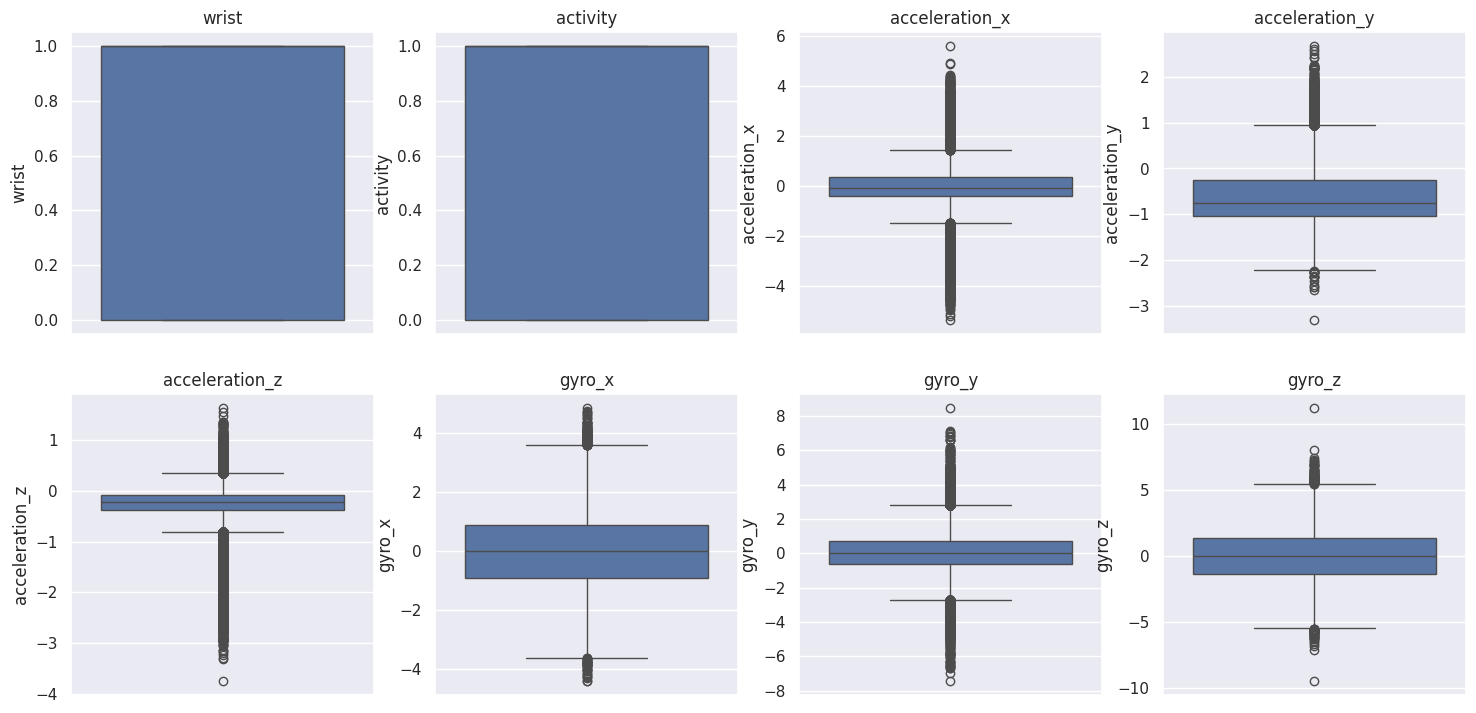

In [27]:
plt.figure(figsize=(18,18))
i=1
for x in df.columns:
    plt.subplot(4,4,i)
    sns.boxplot(y=df[x])
    plt.title(x)
    i+=1

## Checking Correlation

In [8]:
corr = df.corr()
corr

,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
wrist,1.000000,-0.113404,-0.609579,0.087091,0.323680,-0.022092,-0.068403,0.008796
activity,-0.113404,1.000000,-0.017747,0.639520,-0.192435,0.040856,0.012055,-0.008106
acceleration_x,-0.609579,-0.017747,1.000000,-0.265169,-0.552374,-0.021705,-0.004091,-0.060849
acceleration_y,0.087091,0.639520,-0.265169,1.000000,0.106220,0.010549,0.072170,-0.022994
acceleration_z,0.323680,-0.192435,-0.552374,0.106220,1.000000,0.035296,-0.021004,0.049621
gyro_x,-0.022092,0.040856,-0.021705,0.010549,0.035296,1.000000,0.094011,0.317769
gyro_y,-0.068403,0.012055,-0.004091,0.072170,-0.021004,0.094011,1.000000,0.287244
gyro_z,0.008796,-0.008106,-0.060849,-0.022994,0.049621,0.317769,0.287244,1.000000


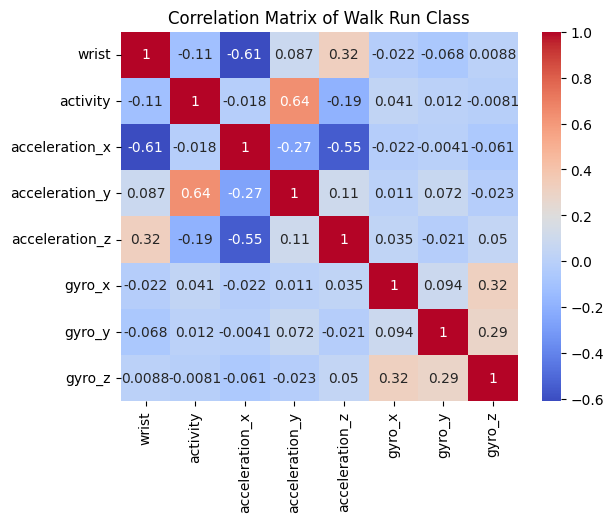

In [9]:
# Visualize the correlation matrix
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Walk Run Class')
plt.show()

From the correlation matrix, it is evident that the acceleration along the y-axis (vertical direction) is highly correlated with the activity being performed. Therefore, it significantly influences the model’s performance.

## Data Preprocessing

In [30]:
X,y = df.iloc[:,2:],df.iloc[:,1]

In [31]:
X

,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
3,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
4,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922
...,...,...,...,...,...,...
88583,0.3084,-0.8376,-0.1327,0.4823,2.0124,0.6048
88584,0.4977,-1.0027,-0.4397,0.1022,-1.2565,-0.0761
88585,0.4587,-1.1780,-0.2827,-1.4500,-0.2792,-1.2616
88586,0.2590,-0.8582,-0.0759,-1.5165,0.4560,-1.7755


In [32]:
y

0        0
1        0
2        0
3        0
4        0
        ..
88583    0
88584    0
88585    0
88586    0
88587    0
Name: activity, Length: 88588, dtype: int64

## Train Test Split

In [33]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=6)

## Modeling

## 1. RandomForest Classifier

In [34]:
rfc = RandomForestClassifier(n_estimators=600,max_depth=11,n_jobs=-1,class_weight='balanced',min_impurity_decrease=1e-9,random_state=5)

In [35]:
rfc.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', max_depth=11,
                       min_impurity_decrease=1e-09, n_estimators=600, n_jobs=-1,
                       random_state=5)

In [36]:
y_pred_train = rfc.predict(X_train)

In [37]:
y_pred_test = rfc.predict(X_test)

In [38]:
y_pred_test.shape

(17718,)

# Feature Importance

In [39]:
feat_imp = pd.DataFrame(data=rfc.feature_importances_,index=rfc.feature_names_in_,columns=['importance'])

In [40]:
feat_imp.sort_values('importance',ascending=False)

,importance
acceleration_y,0.507301
acceleration_z,0.255706
acceleration_x,0.146352
gyro_z,0.059254
gyro_x,0.022521
gyro_y,0.008866


# Evaluation

### Train

In [41]:
accuracy_score(y_train,y_pred_train)

0.989671229010865

In [42]:
f1_score(y_train,y_pred_train)

0.9896487357882233

In [43]:
roc_auc_score(y_train,y_pred_train)

0.989696116172127

In [44]:
precision_score(y_train,y_pred_train)

0.9958449541806591

In [45]:
recall_score(y_train,y_pred_train)

0.9835291472258137

### Test

In [46]:
accuracy_score(y_test,y_pred_test)

0.9855514166384468

In [47]:
f1_score(y_test,y_pred_test)

0.985373100217118

In [48]:
roc_auc_score(y_test,y_pred_test)

0.9855174332834115

In [49]:
precision_score(y_test,y_pred_test)

0.989443488238669

In [50]:
recall_score(y_test,y_pred_test)

0.9813360646409468

- accuracy_score for Train data is 0.9896
- accuracy_score for Test data is 0.9855

## 2. Decision Tree

In [51]:
dtree = DecisionTreeClassifier()

In [52]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [53]:
y_pred_train = dtree.predict(X_train)

In [54]:
y_pred_test = dtree.predict(X_test)

## Feature Importance

In [55]:
feat_imp = pd.DataFrame(data=dtree.feature_importances_,index=dtree.feature_names_in_,columns=['importance'])

In [56]:
feat_imp.sort_values('importance',ascending=False)

,importance
acceleration_y,0.536591
acceleration_z,0.338540
acceleration_x,0.047288
gyro_z,0.045980
gyro_x,0.020160
gyro_y,0.011442


# Evaluation

### Train

In [57]:
accuracy_score(y_train,y_pred_train)

1.0

In [58]:
f1_score(y_train,y_pred_train)

1.0

In [59]:
roc_auc_score(y_train,y_pred_train)

1.0

In [60]:
precision_score(y_train,y_pred_train)

1.0

In [61]:
recall_score(y_train,y_pred_train)

1.0

### Test

In [62]:
accuracy_score(y_test,y_pred_test)

0.9831245061519359

In [63]:
f1_score(y_test,y_pred_test)

0.982994938292669

In [64]:
roc_auc_score(y_test,y_pred_test)

0.9831275200076273

In [65]:
precision_score(y_test,y_pred_test)

0.9824920418371987

In [66]:
recall_score(y_test,y_pred_test)

0.9834983498349835

- accuracy_score for Train data is 1.0 
- accuracy_score for Test data is 0.983

## 3. XGBoost

In [67]:
XG = XGBClassifier(n_estimators=500,learning_rate=0.1,max_depth=60,min_child_weight=5,gamma=6,reg_alpha=40,subsample=0.9,colsample_bytree=0.8,objective='binary:logistic',nthread=-1,scale_pos_weight=(1/y.mean()-1),seed=27,n_jobs=-1)

In [68]:
XG.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=6, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=60, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=-1, nthread=-1,
              num_parallel_tree=None, ...)

In [69]:
y_pred_train = XG.predict(X_train)

In [70]:
y_pred_test = XG.predict(X_test)

## Feature Importance

In [71]:
feat_imp = pd.DataFrame(data=XG.feature_importances_,index=XG.feature_names_in_,columns=['importance'])

In [72]:
feat_imp.sort_values('importance',ascending=False)

,importance
acceleration_y,0.592168
acceleration_z,0.235324
acceleration_x,0.088940
gyro_z,0.047195
gyro_x,0.022777
gyro_y,0.013597


# Evaluation

### Train

In [73]:
accuracy_score(y_train,y_pred_train)

0.9860872019190067

In [74]:
f1_score(y_train,y_pred_train)

0.9860985788405143

In [75]:
roc_auc_score(y_train,y_pred_train)

0.9860999585753248

In [76]:
precision_score(y_train,y_pred_train)

0.9892786421499293

In [77]:
recall_score(y_train,y_pred_train)

0.9829388948226432

### Test

In [78]:
accuracy_score(y_test,y_pred_test)

0.986567332656056

In [79]:
f1_score(y_test,y_pred_test)

0.9864263716208509

In [80]:
roc_auc_score(y_test,y_pred_test)

0.9865480959271261

In [81]:
precision_score(y_test,y_pred_test)

0.9886818337715788

In [82]:
recall_score(y_test,y_pred_test)

0.9841811767383635

- accuracy_score for Train data is 0.9860
- accuracy_score for Test data is 0.9865

### Standard Scaling

In [83]:
sc = StandardScaler()

In [84]:
sc.fit(X_train)

StandardScaler()

In [85]:
sc.transform(X_train)

array([[-0.3166095 , -0.19654781,  0.34869285,  0.06511974, -1.20664255,
        -0.16703128],
       [ 0.11749992, -0.84997448,  0.55321106, -2.29447905,  0.62336066,
        -0.73546603],
       [-0.11420326, -0.24602914,  0.23344519,  0.34181952, -1.75127543,
        -0.33016319],
       ...,
       [-0.10707698, -0.03277374,  0.49177313, -0.73174693,  0.78213188,
         0.78638645],
       [-0.24762312, -0.26667165,  0.20973592,  0.36756089,  0.43477287,
        -0.24247523],
       [-0.22871867, -1.04167665,  0.10417813,  0.9616844 , -0.56671354,
        -0.76797778]])

In [86]:
X_train_sc = pd.DataFrame(data=sc.transform(X_train))

In [87]:
X_test_sc = pd.DataFrame(data=sc.transform(X_test))

## 4. Logistic Regression

In [88]:
lr = LogisticRegression(max_iter=1000)

In [89]:
lr.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [90]:
y_pred_train = lr.predict(X_train_sc)

In [91]:
y_pred_test = lr.predict(X_test_sc)

In [92]:
coefficients = lr.coef_

In [93]:
avg_importance = np.mean(np.abs(coefficients), axis=0)

In [94]:
coefficients

array([[ 0.47208416,  6.89960659, -2.44690034, -0.01004661, -0.16441305,
         0.13140034]])

## Feature Importance

In [95]:
feature_importance = pd.DataFrame(index=X_train_sc.columns,data=avg_importance,columns=['importance'])

In [96]:
feature_importance.sort_values('importance',ascending=False)

,importance
1,6.899607
2,2.446900
0,0.472084
4,0.164413
5,0.131400
3,0.010047


# Evaluation

### Train

In [97]:
accuracy_score(y_train,y_pred_train)

0.7532242133483844

In [98]:
f1_score(y_train,y_pred_train)

0.7926689032992306

In [99]:
roc_auc_score(y_train,y_pred_train)

0.7524687039245103

In [100]:
precision_score(y_train,y_pred_train)

0.6854331112250128

In [101]:
recall_score(y_train,y_pred_train)

0.9396818258474338

### Test

In [102]:
accuracy_score(y_test,y_pred_test)

0.745795236482673

In [103]:
f1_score(y_test,y_pred_test)

0.7852784134248665

In [104]:
roc_auc_score(y_test,y_pred_test)

0.747339060409232

In [105]:
precision_score(y_test,y_pred_test)

0.6756911969808844

In [106]:
recall_score(y_test,y_pred_test)

0.9372937293729373

- accuracy_score for Train data is 0.7532
- accuracy_score for Test data is 0.7457

## 5. SVM

In [107]:
svm = SVC(max_iter=2000)

In [108]:
svm.fit(X_train_sc,y_train)

SVC(max_iter=2000)

In [109]:
y_pred_train = svm.predict(X_train_sc)

In [110]:
y_pred_test = svm.predict(X_test_sc)

# Evaluation

### Train

In [111]:
accuracy_score(y_train,y_pred_train)

0.9875687879215465

In [112]:
f1_score(y_train,y_pred_train)

0.9875636989878742

In [113]:
roc_auc_score(y_train,y_pred_train)

0.9875865228380434

In [114]:
precision_score(y_train,y_pred_train)

0.9919745909310042

In [115]:
recall_score(y_train,y_pred_train)

0.9831918601382877

### Test

In [116]:
accuracy_score(y_test,y_pred_test)

0.9886556044700304

In [117]:
f1_score(y_test,y_pred_test)

0.9885149420033141

In [118]:
roc_auc_score(y_test,y_pred_test)

0.9886213674359918

In [119]:
precision_score(y_test,y_pred_test)

0.9926554969015378

In [120]:
recall_score(y_test,y_pred_test)

0.9844087857061569

- accuracy_score for Test data is 0.9875
- accuracy_score for Test data is 0.9886

## 6. KNN

In [121]:
neigh = KNeighborsClassifier(n_neighbors=3)

In [122]:
neigh.fit(X_train_sc,y_train)

KNeighborsClassifier(n_neighbors=3)

In [123]:
y_pred_train = neigh.predict(X_train_sc)

In [124]:
y_pred_test = neigh.predict(X_test_sc)

# Evaluation

### Train

In [125]:
accuracy_score(y_train,y_pred_train)

0.9935092422745873

In [126]:
f1_score(y_train,y_pred_train)

0.9935125377260035

In [127]:
roc_auc_score(y_train,y_pred_train)

0.9935233725749893

In [128]:
precision_score(y_train,y_pred_train)

0.9970278532608695

In [129]:
recall_score(y_train,y_pred_train)

0.9900219236606892

### Test

In [130]:
accuracy_score(y_test,y_pred_test)

0.9899537193814201

In [131]:
f1_score(y_test,y_pred_test)

0.98981926332647

In [132]:
roc_auc_score(y_test,y_pred_test)

0.9899117696046763

In [133]:
precision_score(y_test,y_pred_test)

0.9949407841784523

In [134]:
recall_score(y_test,y_pred_test)

0.9847501991578468

- accuracy_score for Test data is 0.9935
- accuracy_score for Test data is 0.9899

## 7. Sequential Neural Network

In [135]:
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


2024-05-27 22:12:02.006304: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-27 22:12:02.021770: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-27 22:12:02.021839: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-27 22:12:02.023724: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-27 22:12:02.023784: I tensorflow/compile

In [136]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [137]:
# Train model
model.fit(X_train, y_train, epochs=100, batch_size=1024, validation_data=(X_test, y_test))


Epoch 1/100


2024-05-27 22:12:04.039466: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f374004a6c0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-05-27 22:12:04.039518: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3070 Ti Laptop GPU, Compute Capability 8.6
2024-05-27 22:12:04.044139: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-05-27 22:12:04.056127: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8700
2024-05-27 22:12:04.118189: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


70/70 [==============================] - 2s 6ms/step - loss: 0.4797 - accuracy: 0.8260 - val_loss: 0.2987 - val_accuracy: 0.8980
Epoch 2/100
70/70 [==============================] - 0s 6ms/step - loss: 0.2269 - accuracy: 0.9184 - val_loss: 0.1763 - val_accuracy: 0.9409
Epoch 3/100
70/70 [==============================] - 0s 5ms/step - loss: 0.1394 - accuracy: 0.9563 - val_loss: 0.1131 - val_accuracy: 0.9675
Epoch 4/100
70/70 [==============================] - 0s 5ms/step - loss: 0.0954 - accuracy: 0.9712 - val_loss: 0.0849 - val_accuracy: 0.9754
Epoch 5/100
70/70 [==============================] - 0s 5ms/step - loss: 0.0752 - accuracy: 0.9768 - val_loss: 0.0698 - val_accuracy: 0.9797
Epoch 6/100
70/70 [==============================] - 0s 5ms/step - loss: 0.0639 - accuracy: 0.9798 - val_loss: 0.0609 - val_accuracy: 0.9814
Epoch 7/100
70/70 [==============================] - 0s 6ms/step - loss: 0.0568 - accuracy: 0.9821 - val_loss: 0.0548 - val_accuracy: 0.9834
Epoch 8/100
70/70 [======

In [138]:
# Evaluate model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy * 100}%')


  1/554 [..............................] - ETA: 9s - loss: 8.7417e-04 - accuracy: 1.0000554/554 [==============================] - 2s 3ms/step - loss: 0.0246 - accuracy: 0.9921
Test Accuracy: 99.20984506607056%


## Hyperparmeter Tuning for Sequential Neural Network

In [140]:
def build_model(hp):
    model = keras.Sequential()
    model.add(layers.Dense(units=hp.Int('units', min_value=32, max_value=512, step=32), 
                          activation='relu', input_shape=(X_train.shape[1],)))
    model.add(layers.Dropout(hp.Float('dropout', min_value=0.0, max_value=0.5, step=0.1)))
    model.add(layers.Dense(units=hp.Int('units', min_value=32, max_value=512, step=32), 
                          activation='relu'))
    model.add(layers.Dropout(hp.Float('dropout', min_value=0.0, max_value=0.5, step=0.1)))
    model.add(layers.Dense(units=hp.Int('units', min_value=32, max_value=512, step=32), 
                          activation='relu'))
    model.add(layers.Dropout(hp.Float('dropout', min_value=0.0, max_value=0.5, step=0.1)))
    
    model.add(layers.Dense(num_classes, activation='sigmoid'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
        loss='categorical_crossentropy',
        metrics=['accuracy'])
    return model

In [141]:
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=25,
    executions_per_trial=3,
    directory='my_dir',
    project_name='Employee_performance')

tuner.search(X_train, y_train,
             epochs=25,
             validation_data=(X_test, y_test_encoded),batch_size=1024)

Reloading Tuner from my_dir/walkrun_classification/tuner0.json


In [142]:
best_model = tuner.get_best_models(num_models=1)[0]

In [143]:
best_model.fit(X_train, y_train, epochs=100, batch_size=1024, validation_data=(X_test, y_test))


Epoch 1/100
70/70 [==============================] - 2s 8ms/step - loss: 0.0246 - accuracy: 0.9914 - val_loss: 0.0265 - val_accuracy: 0.9920
Epoch 2/100
70/70 [==============================] - 0s 6ms/step - loss: 0.0251 - accuracy: 0.9910 - val_loss: 0.0228 - val_accuracy: 0.9915
Epoch 3/100
70/70 [==============================] - 0s 6ms/step - loss: 0.0241 - accuracy: 0.9912 - val_loss: 0.0227 - val_accuracy: 0.9920
Epoch 4/100
70/70 [==============================] - 0s 5ms/step - loss: 0.0248 - accuracy: 0.9915 - val_loss: 0.0229 - val_accuracy: 0.9921
Epoch 5/100
70/70 [==============================] - 0s 6ms/step - loss: 0.0234 - accuracy: 0.9915 - val_loss: 0.0229 - val_accuracy: 0.9919
Epoch 6/100
70/70 [==============================] - 0s 6ms/step - loss: 0.0234 - accuracy: 0.9921 - val_loss: 0.0241 - val_accuracy: 0.9921
Epoch 7/100
70/70 [==============================] - 0s 6ms/step - loss: 0.0248 - accuracy: 0.9913 - val_loss: 0.0227 - val_accuracy: 0.9924
Epoch 8/100
7

In [144]:
y_pred_train = best_model.predict(X_train)

2215/2215 [==============================] - 4s 2ms/step


In [145]:
y_pred_test = best_model.predict(X_test)

554/554 [==============================] - 1s 2ms/step


In [146]:
y_pred_train = np.array(y_pred_train>0.5,dtype='int')

In [147]:
y_pred_test = np.array(y_pred_test>0.5,dtype='int')

# Evaluation

### Train

In [148]:
accuracy_score(y_train,y_pred_train)

0.9949626075913645

In [149]:
f1_score(y_train,y_pred_train)

0.9949738839065734

In [150]:
roc_auc_score(y_train,y_pred_train)

0.9949697574449142

In [151]:
precision_score(y_train,y_pred_train)

0.9967560858649968

In [152]:
recall_score(y_train,y_pred_train)

0.9931980437348924

### Test

In [153]:
accuracy_score(y_test,y_pred_test)

0.992437069646687

In [154]:
f1_score(y_test,y_pred_test)

0.992369020501139

In [155]:
roc_auc_score(y_test,y_pred_test)

0.9924301477673048

In [156]:
precision_score(y_test,y_pred_test)

0.9931608343782059

In [157]:
recall_score(y_test,y_pred_test)

0.9915784681916467

There has been a slight improvement in accuracy after hyperparameter tuning, increasing from 99.21% to 99.24%

## 8. Long Short-Term Memory (LSTM)

In [158]:
def time_series_to_lstm_dataset(X, y, look_back):
    # Initialize output lists
    X_train = []
    y_train = []

    # Loop through each sample in the dataset
    for i in range(len(X) - look_back+1):
        # Extract the current and previous `look_back` samples
        sample = X[i:i+look_back,:]
        target = y[i+look_back-1]

        # Append to training sets
        X_train.append(sample)
        y_train.append(target)

    return np.array(X_train), np.array(y_train)

In [159]:
# Reshape input to be 3D [samples, timesteps, features]
X_train_ls,y_train_ls = time_series_to_lstm_dataset(X_train.values,y_train.values,10)
X_test_ls,y_test_ls = time_series_to_lstm_dataset(X_test.values,y_test.values,10)

In [160]:
X_train_ls.shape

(70861, 10, 6)

In [161]:
y_train_ls.sum()/len(y_train_ls)

0.5020533156461241

In [162]:
def scheduler(epoch, lr):
    if epoch < 50:
        return lr
    else:
        return lr*np.exp(-0.01)

In [163]:
callback = LearningRateScheduler(scheduler)
early_stop = EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=100,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=True,
    start_from_epoch=0
)

In [164]:
# Define the LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(X_train_ls.shape[1], X_train_ls.shape[2]),return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(20))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

In [165]:
# Compile the model
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=1e-3), metrics=['accuracy'])

In [166]:
# Fit the model
model.fit(X_train_ls, y_train_ls, epochs=100, batch_size=4096, validation_data=(X_test_ls, y_test_ls), shuffle=True,callbacks=[callback,early_stop])

Epoch 1/100
18/18 [==============================] - 3s 53ms/step - loss: 0.6889 - accuracy: 0.5488 - val_loss: 0.6841 - val_accuracy: 0.5851 - lr: 0.0010
Epoch 2/100
18/18 [==============================] - 0s 13ms/step - loss: 0.6792 - accuracy: 0.5968 - val_loss: 0.6690 - val_accuracy: 0.6488 - lr: 0.0010
Epoch 3/100
18/18 [==============================] - 0s 13ms/step - loss: 0.6530 - accuracy: 0.6563 - val_loss: 0.6148 - val_accuracy: 0.7627 - lr: 0.0010
Epoch 4/100
18/18 [==============================] - 0s 14ms/step - loss: 0.5675 - accuracy: 0.7592 - val_loss: 0.4674 - val_accuracy: 0.8610 - lr: 0.0010
Epoch 5/100
18/18 [==============================] - 0s 13ms/step - loss: 0.4432 - accuracy: 0.8300 - val_loss: 0.3544 - val_accuracy: 0.8773 - lr: 0.0010
Epoch 6/100
18/18 [==============================] - 0s 13ms/step - loss: 0.3544 - accuracy: 0.8621 - val_loss: 0.2930 - val_accuracy: 0.8984 - lr: 0.0010
Epoch 7/100
18/18 [==============================] - 0s 13ms/step - lo

In [167]:
# Evaluate the model
scores = model.evaluate(X_test_ls, y_test_ls, verbose=0)
print("Accuracy: %.6f%%" % (scores[1]*100))

Accuracy: 98.599583%


## Hyperparameter Tuning for LSTM

In [168]:
def build_model(hp):
    model = keras.Sequential()
    model.add(layers.LSTM(units=hp.Int('units', min_value=32, max_value=512, step=32), 
                          activation='tanh', input_shape=(X_train_ls.shape[1], X_train_ls.shape[2]),return_sequences=True))
    model.add(layers.Dropout(hp.Float('dropout', min_value=0.0, max_value=0.5, step=0.1)))
    # model.add(layers.LSTM(units=hp.Int('units', min_value=32, max_value=512, step=32), 
    #                       activation='tanh',return_sequences=True))
    # model.add(layers.Dropout(hp.Float('dropout', min_value=0.0, max_value=0.5, step=0.1)))
    model.add(layers.LSTM(units=hp.Int('units', min_value=32, max_value=512, step=32), 
                          activation='tanh'))
    model.add(layers.Dropout(hp.Float('dropout', min_value=0.0, max_value=0.5, step=0.1)))
    
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=['accuracy'])
    return model

In [169]:
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=35,
    executions_per_trial=3,
    directory='my_dir',
    project_name='walkrun_classification_lstm')

tuner.search(X_train_ls, y_train_ls,
             epochs=50,
             validation_data=(X_test_ls, y_test_ls),batch_size=1024)

Reloading Tuner from my_dir/walkrun_classification_lstm/tuner0.json


In [170]:
best_model = tuner.get_best_models(num_models=1)

In [171]:
model = best_model[0]

In [172]:
 model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=1e-3), metrics=['accuracy'])

In [173]:
# Fit the model
model.fit(X_train_ls, y_train_ls, epochs=100, batch_size=512, validation_data=(X_test_ls, y_test_ls), shuffle=True,callbacks=[callback,early_stop])

Epoch 1/100
139/139 [==============================] - 4s 17ms/step - loss: 0.0317 - accuracy: 0.9889 - val_loss: 0.0332 - val_accuracy: 0.9892 - lr: 0.0100
Epoch 2/100
139/139 [==============================] - 2s 11ms/step - loss: 0.0315 - accuracy: 0.9889 - val_loss: 0.0340 - val_accuracy: 0.9890 - lr: 0.0100
Epoch 3/100
139/139 [==============================] - 1s 10ms/step - loss: 0.0300 - accuracy: 0.9896 - val_loss: 0.0327 - val_accuracy: 0.9890 - lr: 0.0100
Epoch 4/100
139/139 [==============================] - 1s 10ms/step - loss: 0.0287 - accuracy: 0.9901 - val_loss: 0.0336 - val_accuracy: 0.9896 - lr: 0.0100
Epoch 5/100
139/139 [==============================] - 1s 11ms/step - loss: 0.0274 - accuracy: 0.9905 - val_loss: 0.0348 - val_accuracy: 0.9890 - lr: 0.0100
Epoch 6/100
139/139 [==============================] - 1s 11ms/step - loss: 0.0280 - accuracy: 0.9902 - val_loss: 0.0379 - val_accuracy: 0.9886 - lr: 0.0100
Epoch 7/100
139/139 [==============================] - 1s 

In [174]:
model_json = model.to_json()
with open("lstm_model.json", "w") as json_file:
    json_file.write(model_json)

# Save model weights
model.save_weights("lstm_model_weights.h5")


In [175]:
import numpy as np
from keras.models import model_from_json

# Load model architecture from JSON
with open('lstm_model.json', 'r') as json_file:
    loaded_model_json = json_file.read()
loaded_model = model_from_json(loaded_model_json)

# Load model weights
loaded_model.load_weights("lstm_model_weights.h5")

In [176]:
y_pred_train = loaded_model.predict(X_train_ls)

2215/2215 [==============================] - 9s 4ms/step


In [177]:
y_pred_test = loaded_model.predict(X_test_ls)

554/554 [==============================] - 2s 4ms/step


In [178]:
y_pred_train = np.array(y_pred_train>0.5,dtype='int')

In [179]:
y_pred_test = np.array(y_pred_test>0.5,dtype='int')

# Evaluation

### Train

In [180]:
accuracy_score(y_train_ls,y_pred_train)

0.9999012150548257

In [181]:
f1_score(y_train_ls,y_pred_train)

0.9999016176863291

In [182]:
roc_auc_score(y_train_ls,y_pred_train)

0.9999012713431593

In [183]:
precision_score(y_train_ls,y_pred_train)

0.9999156711173577

In [184]:
recall_score(y_train_ls,y_pred_train)

0.999887564650326

### Test

In [185]:
accuracy_score(y_test_ls,y_pred_test)

0.9877463436670619

In [186]:
f1_score(y_test_ls,y_pred_test)

0.9876402574471721

In [187]:
roc_auc_score(y_test_ls,y_pred_test)

0.987744971170258

In [188]:
precision_score(y_test_ls,y_pred_test)

0.9876965140123035

In [189]:
recall_score(y_test_ls,y_pred_test)

0.9875840072901242

In this model, the accuracy increased from 98.5% to 98.7% after hyperparameter tuning.

# Conclusion

- The walk-run classification project distinguishes itself in the competitive field of activity recognition.
- Initial experiments were conducted with six different algorithms - Random Forest Classifier, Decision Tree Classifier, XG Boost, Logistic Regression, SVM, and KNN. Following these, a Sequential Neural Network was implemented, achieving a commendable test accuracy of 99.24%.
- LSTM is implemented after the sequential neural network, and it achieved a test accuracy of 98.5%. However, during hyperparameter tuning, it increased to 98.7%, which is slightly lower than the accuracy of the sequential neural network.
- While LSTM models are typically considered a good fit for sequential data, it is surprising that a sequential neural network outperformed the LSTM model in terms of accuracy during hyperparameter tuning. To ensure the most efficient utilization of the models’ capabilities, hyperparameter tuning was performed, further optimizing these models.
- The sequential neural network, achieving an impressive accuracy of 99.24% on test datasets,sets a new standard in the field. Its ability to accurately classify walking and running activities in real-time makes it an essential tool for fitness enthusiasts, sports coaches, and health researchers. The model’s robust performance across different devices and conditions showcases its versatility and adaptability. As the model continues to be refined and its capabilities expanded, it promises to unlock even more possibilities in the realm of activity recognition.
- This study is essential for developing targeted engagement strategies as it identifies the most active users who are likely to respond positively to fitness campaigns. The insights gained from accurately classifying walking and running activities can be used to tailor fitness challenges, rewards, or personalized training plans, thereby enhancing user retention and satisfaction. Furthermore, the potential of this approach to revolutionize personal fitness tracking can be leveraged in marketing campaigns to attract new users and retain existing ones.


# Suggestion

- To give the model a richer context, provide more detailed data, such as  Heart rate,GPS Data,Step Count,Calorie Burn Data,Galvanic Skin Response (GSR),Skin Temperature.
- Create a platform where users can share their experiences, challenges, and achievements. This can foster a sense of community and further enhance user engagement.
- Forming partnerships with fitness brands or health organizations could lead to exclusive benefits for active users, creating a mutually beneficial scenario.
- The model’s accuracy and relevance can be maintained by continuously refining it based on user feedback and new data.
- By expanding the model to classify other physical activities, a wider range of users could be attracted. 

# Risks

- Factors such as the surface and the user’s footwear can affect the accelerometer and gyroscope readings. If the model is trained on data collected under a specific set of conditions, it might not perform as well under different conditions.
- The performance of a model is significantly influenced by the quality of the data; noisy, outlier-ridden can negatively impact results.
- Consistency in data collection is crucial as discrepancies arising from using different devices or conditions can affect the model’s performance.
